# Tutorial 1: Getting Started with the Multimodal Universe

Welcome to your first tutorial! This notebook will help you:
- Check your Python environment
- Load your first dataset from the Multimodal Universe
- Understand the data structure
- Make your first visualization
- Save data for offline work

**Note**: All dataset (previews) are at https://huggingface.co/MultimodalUniverse/datasets

See the documentation for examples on how to install/load the `mmu` package, which provides some useful utilities

## 1. Environment Check

Let's first make sure you have all the required packages:

In [ ]:
# Check Python version
import sys
print(f"Python version: {sys.version}")

# Import required packages
import numpy as np
print(f"NumPy version: {np.__version__}")

import matplotlib.pyplot as plt
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")

import pandas as pd
print(f"Pandas version: {pd.__version__}")

from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy
print(f"Astropy version: {astropy.__version__}")

# Most importantly, the datasets library
from datasets import load_dataset
import datasets
print(f"Datasets version: {datasets.__version__}")

import pickle  # For saving data

print("\n✅ All packages imported successfully!")

Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:17:47) [GCC 11.2.0]
NumPy version: 2.2.6


Matplotlib version: 3.10.6
Pandas version: 2.3.2


Astropy version: 7.1.0


Datasets version: 4.1.1

✅ All packages imported successfully!


## 2. Your First Dataset Load

Let's start with the PLAsTiCC dataset - it's relatively small and loads quickly:

In [ ]:
# Load PLAsTiCC dataset in streaming mode
# Streaming mode means we don't download the whole dataset at once
# See the datasets documentation for more details and examples
print("Loading PLAsTiCC dataset in streaming mode...")
dataset = load_dataset(
    "MultimodalUniverse/plasticc",
    split="train",
    streaming=True
)

print("✅ Dataset loaded successfully!")
print(f"Dataset type: {type(dataset)}")

Loading PLAsTiCC dataset in streaming mode...


✅ Dataset loaded successfully!
Dataset type: <class 'datasets.iterable_dataset.IterableDataset'>


## 3. Exploring Data Structure

As an example, let's start with PLAsTiCC. That dataset contains simulated light curves for the LSST survey. Let's explore the structure:

In [3]:
# Get the first example
example = next(iter(dataset))

# See what fields are available
print("Available fields in the dataset:")
print("-" * 40)
for key in example.keys():
    value = example[key]
    if isinstance(value, dict):
        print(f"{key:20s} : dict with keys {list(value.keys())}")
    elif isinstance(value, np.ndarray):
        print(f"{key:20s} : array with shape {value.shape}")
    elif isinstance(value, (int, float)):
        print(f"{key:20s} : {type(value).__name__} = {value}")
    else:
        print(f"{key:20s} : {type(value).__name__}")

Available fields in the dataset:
----------------------------------------
lightcurve           : dict with keys ['band', 'flux', 'flux_err', 'time']
hostgal_photoz       : float = 0.7269999980926514
hostgal_specz        : float = 0.6809999942779541
redshift             : float = 0.6840000152587891
obj_type             : str
object_id            : str


In [4]:
# Examine the lightcurve structure
print("Lightcurve structure:")
print("-" * 40)
print(f"Object ID: {example['object_id']}")
print(f"Object Type: {example['obj_type']}")
print(f"Redshift: {example['redshift']:.4f}")

# The lightcurve is stored as a dictionary
lightcurve = example['lightcurve']
print(f"Lightcurve keys: {list(lightcurve.keys())}")

# Extract the components
times = np.array(lightcurve['time'])
bands = np.array(lightcurve['band'])
flux = np.array(lightcurve['flux'])
flux_err = np.array(lightcurve['flux_err'])

print(f"\nNumber of observations: {len(times)}")
print(f"Unique bands: {np.unique(bands)}")
print(f"Time range: {times.min():.1f} to {times.max():.1f} days")

Lightcurve structure:
----------------------------------------
Object ID: 21846282
Object Type: SNIa
Redshift: 0.6840
Lightcurve keys: ['band', 'flux', 'flux_err', 'time']

Number of observations: 756
Unique bands: ['Y' 'g' 'i' 'r' 'u' 'z']
Time range: 0.0 to 60661.1 days


## 4. Your First Visualization

Let's plot the light curve:

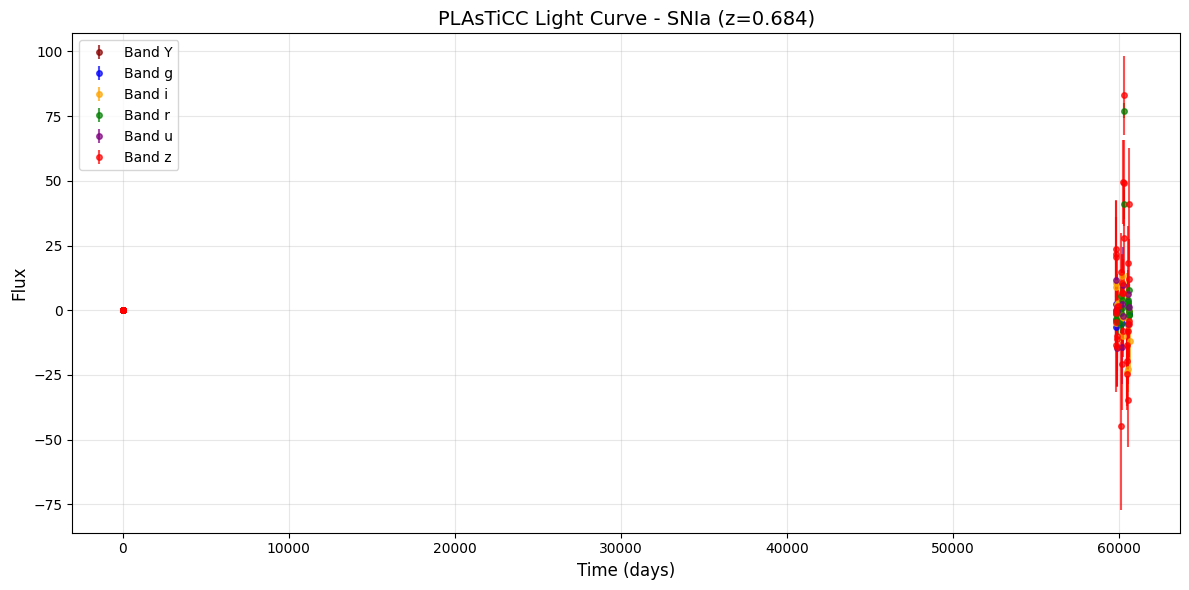

In [5]:
# Set up the plot
fig = plt.figure(figsize=(12, 6))

# Define colors for each band
band_colors = {'u': 'purple', 'g': 'blue', 'r': 'green',
               'i': 'orange', 'z': 'red', 'Y': 'darkred'}

# Plot each band separately
for band_name in np.unique(bands):
    # Get data for this band
    mask = bands == band_name
    
    if band_name in band_colors:
        color = band_colors[band_name]
    else:
        color = 'gray'
    
    # Plot with error bars
    plt.errorbar(times[mask], flux[mask], yerr=flux_err[mask],
                fmt='o', label=f'Band {band_name}',
                color=color, alpha=0.7, markersize=4)

plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Flux', fontsize=12)
plt.title(f'PLAsTiCC Light Curve - {example["obj_type"]} (z={example["redshift"]:.3f})',
         fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

It is clear that the (0, 0) point is likely a placeholder that we want to remove. This type of checking is useful for finding potential artifacts, bugs, etc. when looking through the datasets.

## 5. Loading Multiple Examples

Let's load several examples and see the variety in the data:

In [ ]:
# Load 10 examples
examples = []
dataset_iter = iter(dataset)

print("Loading 10 examples...")
for i in range(10):
    example = next(dataset_iter)
    examples.append({
        'object_id': example['object_id'],
        'obj_type': example['obj_type'],
        'redshift': example['redshift'],
        'num_observations': len(example['lightcurve']['time'])
    })
    print(f"  Loaded object {i+1}/10: ID={example['object_id']}")

# Convert to DataFrame for easy viewing (with pandas)
df = pd.DataFrame(examples)
print("\nSummary of loaded objects:")
print(df)

# Show statistics
print("\nObject type distribution:")
print(df['obj_type'].value_counts())

Loading 10 examples...


  Loaded object 1/10: ID=21846282
  Loaded object 2/10: ID=114421739
  Loaded object 3/10: ID=30652072
  Loaded object 4/10: ID=107732897
  Loaded object 5/10: ID=121186562
  Loaded object 6/10: ID=10905347
  Loaded object 7/10: ID=16775731
  Loaded object 8/10: ID=31971611
  Loaded object 9/10: ID=50875482
  Loaded object 10/10: ID=52437992

Summary of loaded objects:
   object_id obj_type  redshift  num_observations
0   21846282     SNIa     0.684               756
1  114421739      AGN     1.975               756
2   30652072     SNII     0.455               828
3  107732897      TDE     0.054               828
4  121186562      AGN     0.616               828
5   10905347     SNII     0.433               840
6   16775731     SNIa     0.394               840
7   31971611     SNII     0.154               840
8   50875482    SNIbc     0.177               840
9   52437992      AGN     0.318               840

Object type distribution:
obj_type
AGN      3
SNII     3
SNIa     2
TDE      

## 6. Loading Without Streaming

For development, you might want to download a subset for faster access rather than just one at a time. This is shown below.

In [7]:
# Load first 100 examples (downloads to cache)
print("Downloading first 100 examples (this may take a moment)...")
dataset_subset = load_dataset(
    "MultimodalUniverse/plasticc",
    split="train[:100]"
)

print(f"✅ Downloaded {len(dataset_subset)} examples")
print("These are now cached locally for fast access")

# You can now access by index
first_example = dataset_subset[0]
print(f"\nFirst object ID: {first_example['object_id']}")
print(f"Object type: {first_example['obj_type']}")

# Show some statistics
obj_types = [dataset_subset[i]['obj_type'] for i in range(len(dataset_subset))]
unique_types = pd.Series(obj_types).value_counts()
print("\nObject types in subset:")
print(unique_types)

✅ Downloaded 100 examples
These are now cached locally for fast access

First object ID: 21846282
Object type: SNIa

Object types in subset:
SNIa         30
SNII         24
TDE          15
SNIbc         9
AGN           6
M-dwarf       4
SNIa-91bg     4
SNIax         3
SLSN-I        2
KN            2
EB            1
Name: count, dtype: int64


Note that other tutorials will show examples of downloading batches of data locally to your hard drive (saving them for later), which is better when you are trying to work with larger quantities of data.

## 7. Saving Data for Offline Work

Once you download a subset from streaming, you can save them for working without internet:

In [8]:
# Convert subset to pandas DataFrame
print("Creating summary DataFrame...")
data_list = []
for i in range(min(20, len(dataset_subset))):  # Save first 20
    obj = dataset_subset[i]
    data_list.append({
        'object_id': obj['object_id'],
        'obj_type': obj['obj_type'],
        'redshift': obj['redshift'],
        'hostgal_photoz': obj['hostgal_photoz'],
        'num_observations': len(obj['lightcurve']['time'])
    })

df = pd.DataFrame(data_list)

# Save to CSV
output_file = 'plasticc_sample.csv'
df.to_csv(output_file, index=False)
print(f"✅ Saved {len(df)} objects to {output_file}")

# Save first 5 light curves as pickle (preserves structure)
light_curves = []
for i in range(min(5, len(dataset_subset))):
    lc = dataset_subset[i]['lightcurve']
    light_curves.append({
        'object_id': dataset_subset[i]['object_id'],
        'lightcurve': lc
    })

with open('plasticc_lightcurves.pkl', 'wb') as f:
    pickle.dump(light_curves, f)
print(f"✅ Saved {len(light_curves)} light curves to plasticc_lightcurves.pkl")

Creating summary DataFrame...
✅ Saved 20 objects to plasticc_sample.csv
✅ Saved 5 light curves to plasticc_lightcurves.pkl


## Summary and Next Steps

Congratulations! You've successfully:
✅ Loaded data from the Multimodal Universe
✅ Explored the PLAsTiCC data structure
✅ Created your first visualization
✅ Learned how to save data locally

### Key Takeaways:
1. Use `streaming=True` for exploration without downloading everything
2. Use `split="train[:N]"` to download specific number of examples
3. PLAsTiCC (and many other datasets) use dictionary structure for light curves
4. Data can be saved as CSV (metadata) and pickle (full structure)

### Next Tutorial:
Continue to `02_data_types.ipynb` to explore images, spectra, and catalogs!